# Data Processing and merge the data from 7days collecting

In [1]:
import pandas as pd

# Load the data from CSV files
temp_data = pd.read_csv('IOT-Temperatures.csv')
humidity_data = pd.read_csv('IOT-Humidity.csv')
microphone_data = pd.read_csv('IOT-Microphone.csv')

try:
    temp_data['time'] = pd.to_datetime(temp_data['time'])
    humidity_data['time'] = pd.to_datetime(humidity_data['time'])
    microphone_data['time'] = pd.to_datetime(microphone_data['time'])

    merged_data = pd.merge(temp_data, humidity_data, on='time', how='inner')
    merged_data = pd.merge(merged_data, microphone_data, on='time', how='inner')

    for column in merged_data.columns:
        if column != 'time':
            merged_data[column] = pd.to_numeric(merged_data[column], errors='coerce').astype(float).round(3)
    merged_data.to_csv('IOT-Merge_data.csv', index=False, float_format='%.3f')
    print(f"Synchronized data saved to: {"IOT-Merge_data.csv"}")

except FileNotFoundError as e:
    print(f"Error: {e}")
    print("Please ensure all input files are uploaded and the file paths are correct.")

except Exception as e:
    print(f"An unexpected error occurred: {e}")

An unexpected error occurred: [Errno 13] Permission denied: 'IOT-Merge_data.csv'


## Plot the data we collect

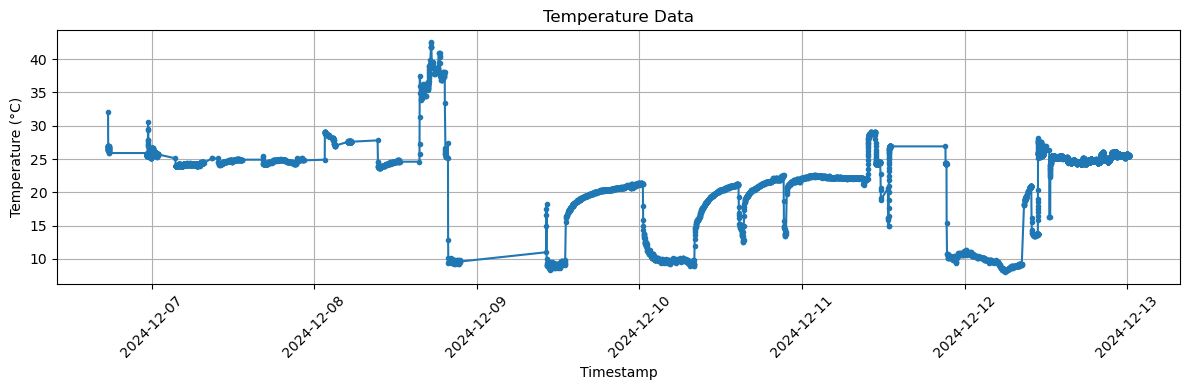

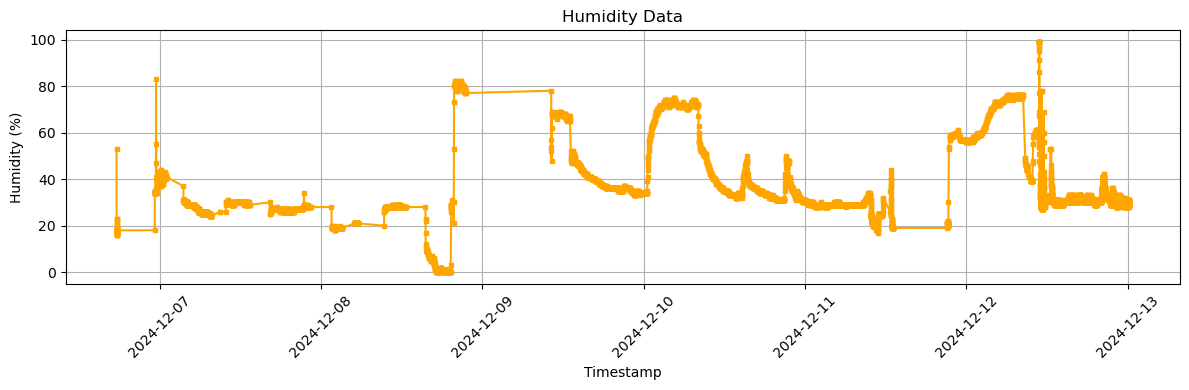

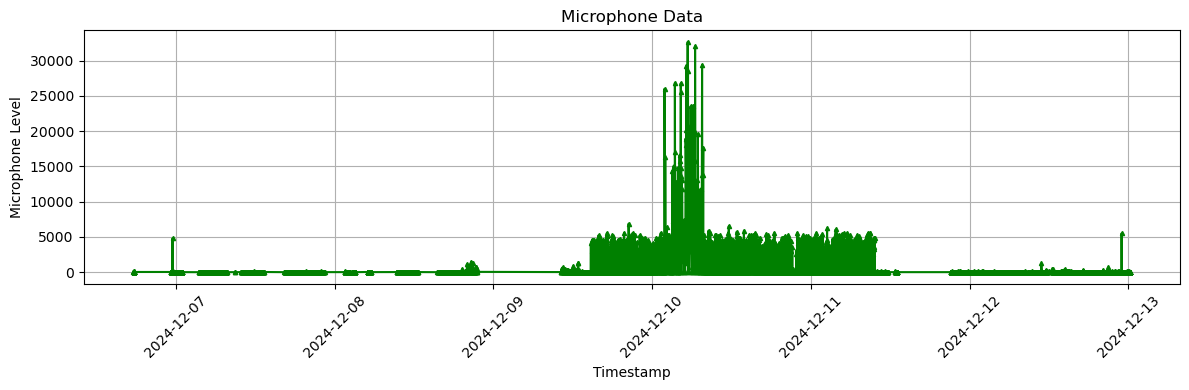

In [2]:
import matplotlib.pyplot as plt    

# Plot separate graphs for each data type
plt.figure(figsize=(12, 4))
plt.plot(merged_data['time'], merged_data.iloc[:, 1], label='Temperature (°C)', marker='o', markersize=3)
plt.title('Temperature Data')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(merged_data['time'], merged_data.iloc[:, 2], label='Humidity (%)', marker='s', markersize=3, color='orange')
plt.title('Humidity Data')
plt.xlabel('Timestamp')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(merged_data['time'], merged_data.iloc[:, 3], label='Microphone Level', marker='^', markersize=3, color='green')
plt.title('Microphone Data')
plt.xlabel('Timestamp')
plt.ylabel('Microphone Level')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Data on 6th December

12_06 data saved to: IOT-1206_data.csv


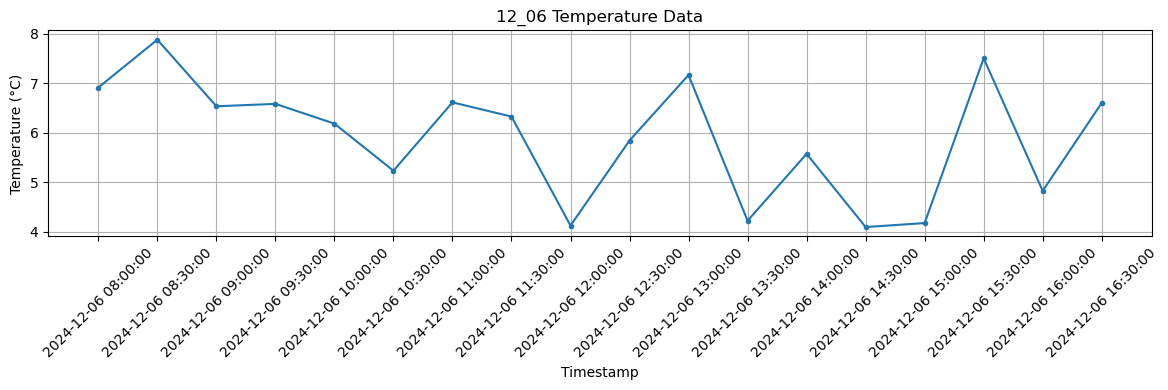

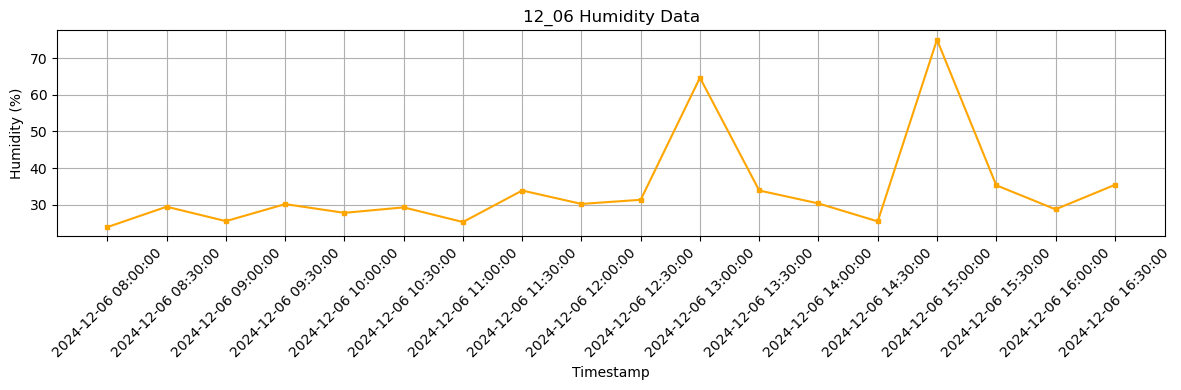

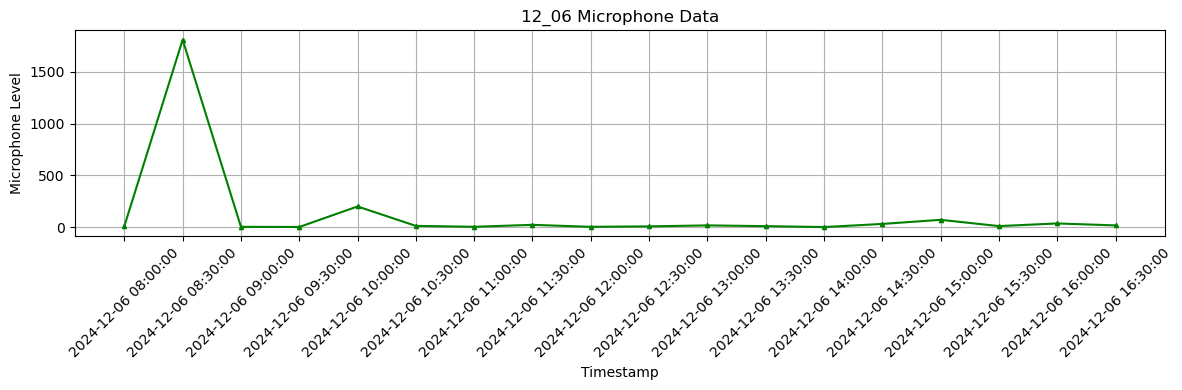

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

SYNC_FILE = 'IOT-Merge_data.csv'
synchronized_data = pd.read_csv(SYNC_FILE)
def generate_shuttle_schedule(start_time, end_time, interval_minutes):
    schedule = []
    current_time = start_time
    while current_time <= end_time:
        schedule.append(current_time)
        current_time += timedelta(minutes=interval_minutes)
    return schedule

# Define shuttle bus schedule (example for Hammersmith to South Kensington)
schedule = generate_shuttle_schedule(datetime(2024, 12, 6, 8, 0), datetime(2024, 12, 6, 16, 40), 30)
def simulate_data(schedule, base_data, noise_level):
    simulated = []
    for timestamp in schedule:
        base_row = base_data.sample(n=1).iloc[0]
        simulated.append({
            'time': timestamp,
            'temperature': np.clip(np.random.normal(6, 1), 3, 9),
            'humidity': max(0, min(100, base_row['humidity'] + np.random.uniform(-noise_level, noise_level))),
            'microphone': max(0, base_row['microphone'] + np.random.uniform(-noise_level, noise_level))
        })
    return pd.DataFrame(simulated)

simulated_data = simulate_data(schedule, synchronized_data, noise_level=5)
simulated_data['time'] = simulated_data['time'].dt.strftime('%Y-%m-%d %H:%M:%S')
for column in ['temperature', 'humidity', 'microphone']:
    simulated_data[column] = simulated_data[column].round(3)
SIMULATED_FILE = 'IOT-1206_data.csv'
simulated_data.to_csv(SIMULATED_FILE, index=False, float_format='%.3f')
print(f"12_06 data saved to: {SIMULATED_FILE}")

# Plot the simulated data
plt.figure(figsize=(12, 4))
plt.plot(simulated_data['time'], simulated_data['temperature'], label='Temperature (°C)', marker='o', markersize=3)
plt.title('12_06 Temperature Data')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(simulated_data['time'], simulated_data['humidity'], label='Humidity (%)', marker='s', markersize=3, color='orange')
plt.title('12_06 Humidity Data')
plt.xlabel('Timestamp')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(simulated_data['time'], simulated_data['microphone'], label='Microphone Level', marker='^', markersize=3, color='green')
plt.title('12_06 Microphone Data')
plt.xlabel('Timestamp')
plt.ylabel('Microphone Level')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Trend of data in 7 days.

C:\Users\Douya\AppData\Local\Temp\ipykernel_55160\259932331.py:15: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_data = iot_data.resample('30T').mean()


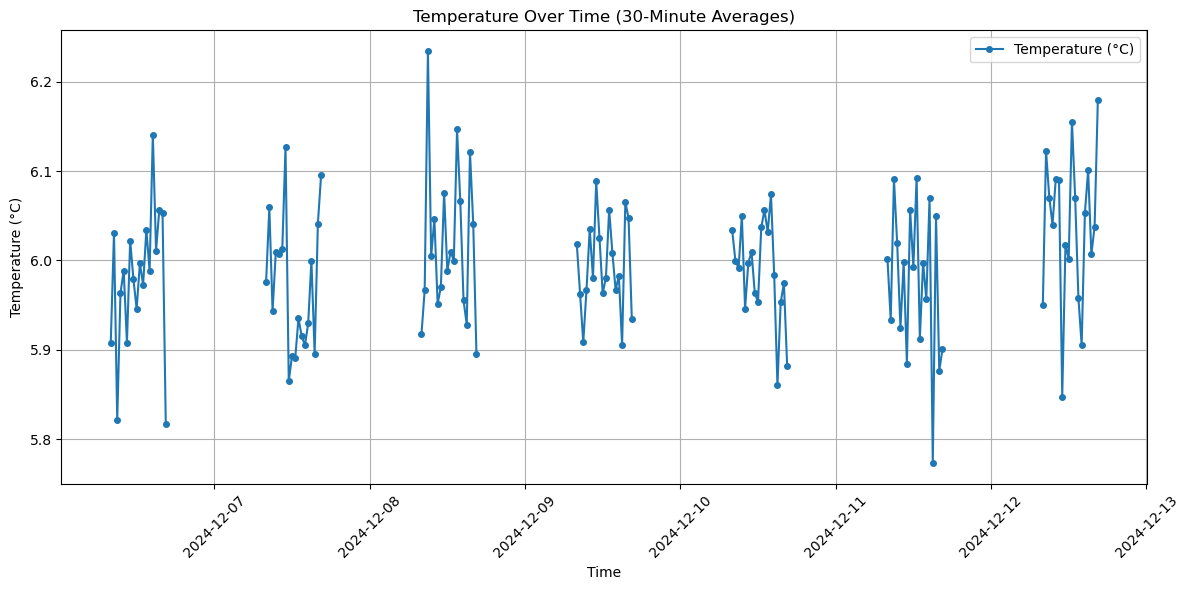

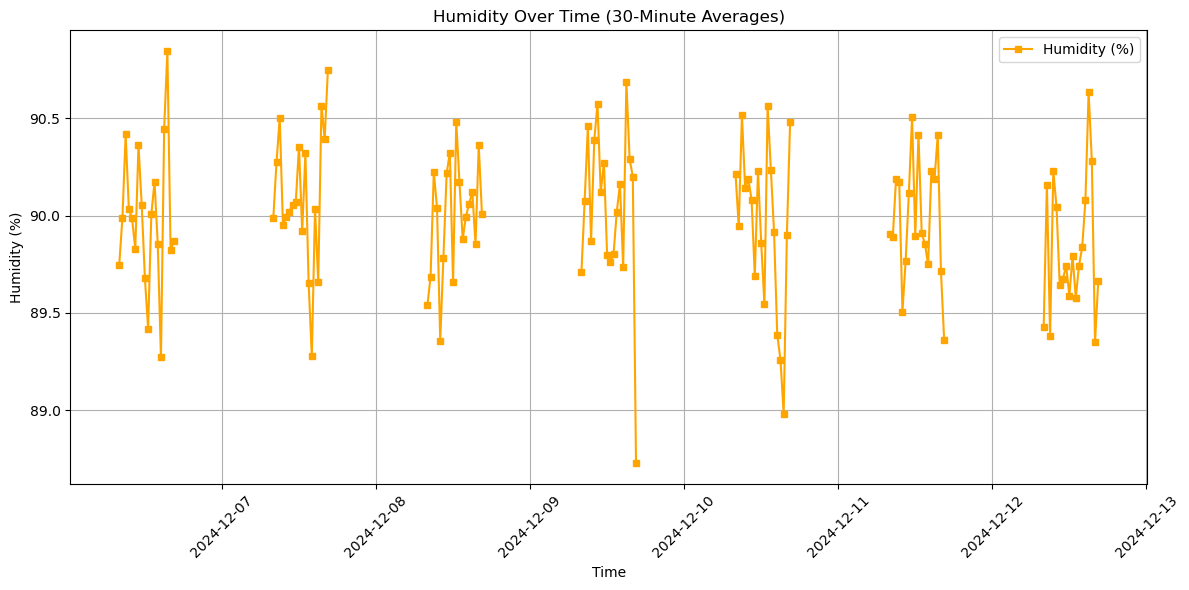

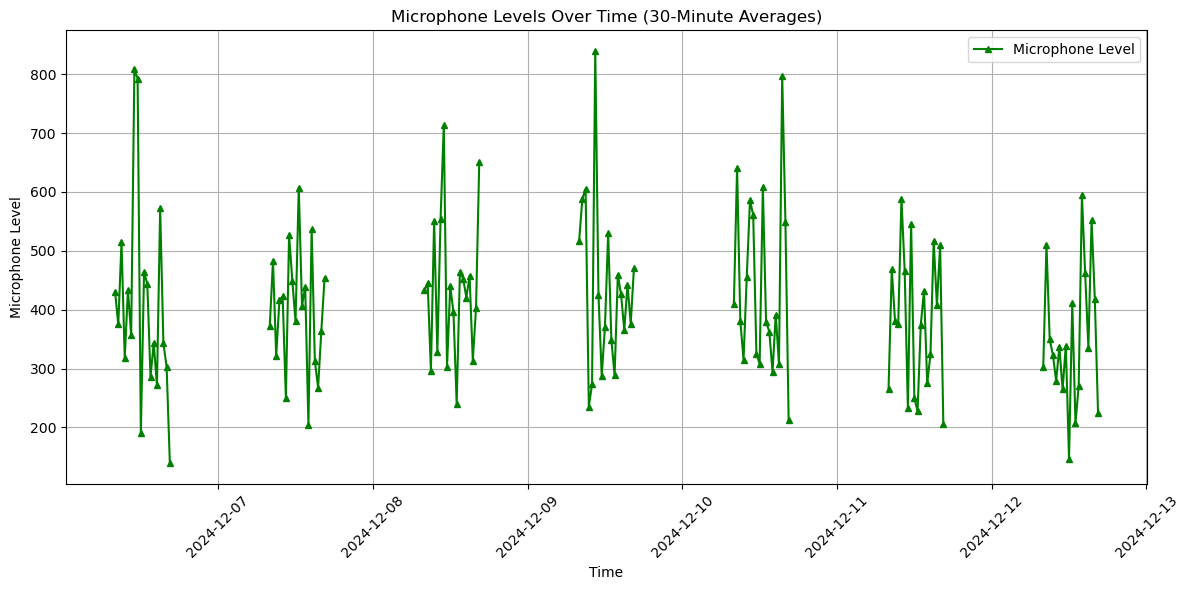

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the large IoT Merge dataset
file_path = 'IOT-Simulate_data.csv'
iot_data = pd.read_csv(file_path)

# Ensure the 'time' column is in datetime format
iot_data['time'] = pd.to_datetime(iot_data['time'])

# Set the 'time' column as the index
iot_data.set_index('time', inplace=True)

# Resample the data to calculate the mean every 30 minutes
resampled_data = iot_data.resample('30T').mean()

# Plot the resampled data
plt.figure(figsize=(12, 6))
plt.plot(resampled_data.index, resampled_data['temperature'], label='Temperature (°C)', marker='o', markersize=4)
plt.title('Temperature Over Time (30-Minute Averages)')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(resampled_data.index, resampled_data['humidity'], label='Humidity (%)', marker='s', markersize=4, color='orange')
plt.title('Humidity Over Time (30-Minute Averages)')
plt.xlabel('Time')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(resampled_data.index, resampled_data['microphone'], label='Microphone Level', marker='^', markersize=4, color='green')
plt.title('Microphone Levels Over Time (30-Minute Averages)')
plt.xlabel('Time')
plt.ylabel('Microphone Level')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


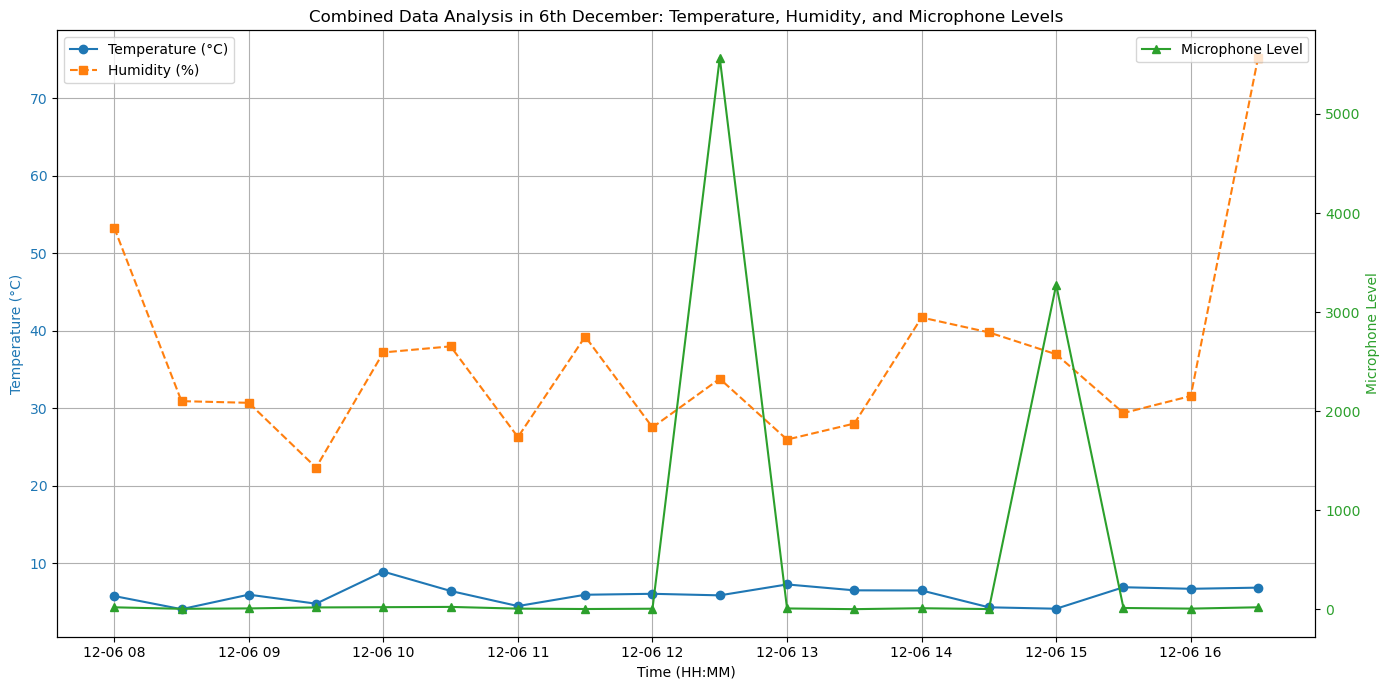

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'IOT-1206_data.csv'
iot_data = pd.read_csv(file_path)
iot_data['time'] = pd.to_datetime(iot_data['time'])
iot_data.set_index('time', inplace=True)
fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.plot(iot_data.index, iot_data['temperature'], label='Temperature (°C)', color='tab:blue', linestyle='-', marker='o')
ax1.set_xlabel('Time (HH:MM)')
ax1.set_ylabel('Temperature (°C)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True)

ax1.plot(iot_data.index, iot_data['humidity'], label='Humidity (%)', color='tab:orange', linestyle='--', marker='s')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(iot_data.index, iot_data['microphone'], label='Microphone Level', color='tab:green', linestyle='-', marker='^')
ax2.set_ylabel('Microphone Level', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')
ax2.legend(loc='upper right')

plt.xticks(rotation=45)
ax1.set_title('Combined Data Analysis in 6th December: Temperature, Humidity, and Microphone Levels')

plt.tight_layout()
plt.show()


Correlation Matrix:
             temperature  humidity  microphone
temperature     1.000000 -0.908257   -0.294439
humidity       -0.908257  1.000000    0.261066
microphone     -0.294439  0.261066    1.000000


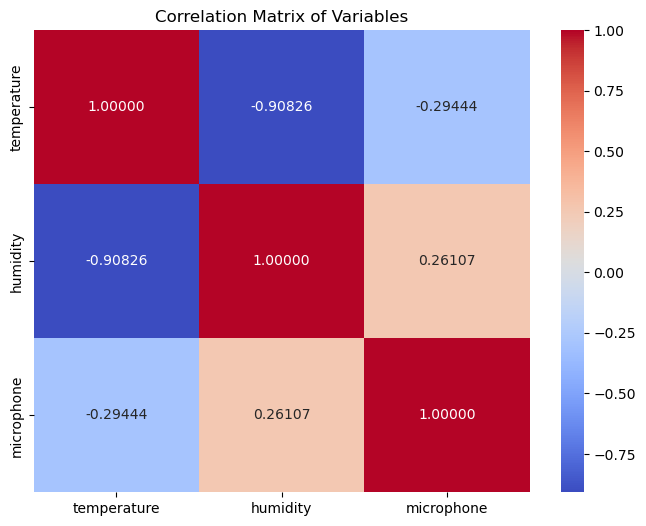

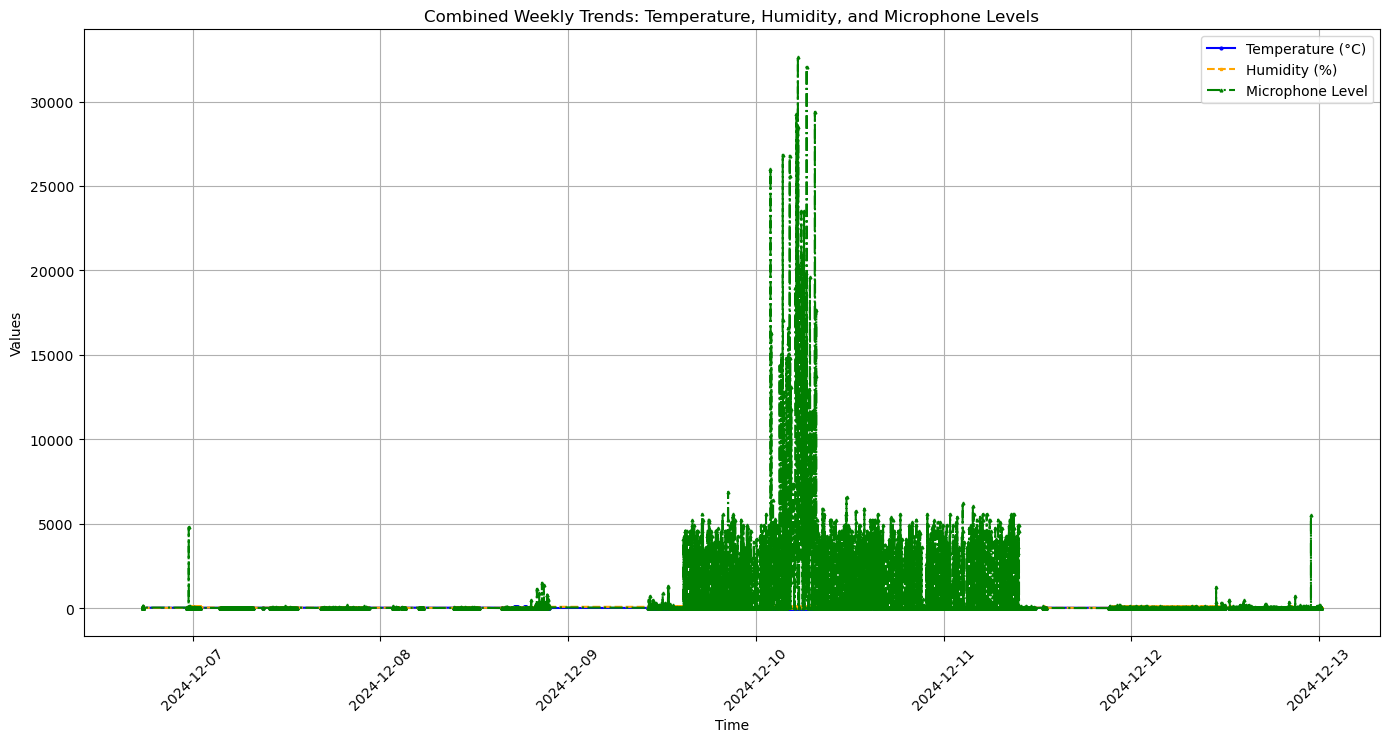

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_path = 'IOT-Merge_data.csv'
data = pd.read_csv(data_path)
data['time'] = pd.to_datetime(data['time'])

data.set_index('time', inplace=True)
correlation_matrix = data[['temperature', 'humidity', 'microphone']].corr()

print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".5f")
plt.title("Correlation Matrix of Variables")
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['temperature'], label='Temperature (°C)', color='blue', linestyle='-', marker='o', markersize=2)
plt.plot(data.index, data['humidity'], label='Humidity (%)', color='orange', linestyle='--', marker='s', markersize=2)
plt.plot(data.index, data['microphone'], label='Microphone Level', color='green', linestyle='-.', marker='^', markersize=2)
plt.title("Combined Weekly Trends: Temperature, Humidity, and Microphone Levels")
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


In [8]:
import statsmodels.api as sm 
file_path = 'IOT-1206_data.csv'
iot_data = pd.read_csv(file_path)

iot_data['people_count'] = (
    (iot_data['microphone'] * 0.5) +
    ((iot_data['temperature'] - iot_data['temperature'].mean()) * 0.3) +
    ((iot_data['humidity'] - iot_data['humidity'].mean()) * 0.2)
).abs().round()

X = iot_data[['microphone', 'temperature', 'humidity']]
y = iot_data['people_count']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
model_summary = model.summary()

# Predict the number of people using the model
iot_data['predicted_people_count'] = model.predict(X)
iot_data[['microphone', 'temperature', 'humidity', 'people_count', 'predicted_people_count']].head(), model_summary


d:\Study\Anaconda\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


(   microphone  temperature  humidity  people_count  predicted_people_count
 0      12.117        7.034    28.878           6.0                6.010111
 1    3602.566        4.896    60.303        1807.0             1806.997412
 2      13.564        6.634    26.978           6.0                6.224530
 3      19.957        6.827    29.737          10.0               10.029488
 4      11.086        7.008    31.006           6.0                5.904105,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:           people_count   R-squared:                       1.000
 Model:                            OLS   Adj. R-squared:                  1.000
 Method:                 Least Squares   F-statistic:                 1.944e+07
 Date:                Fri, 13 Dec 2024   Prob (F-statistic):           1.45e-46
 Time:                        15:20:43   Log-Likelihood:                 3.2360
 No. Observat